In [55]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV 
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import classification_report
from sklearn.base import BaseEstimator,TransformerMixin
from sklearn.svm import SVC
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

In [56]:
data=pd.read_csv(r'C:\Users\Neha Nichani\Desktop\Prerna Data Science\KaggleDataSets\heart.csv')

In [57]:
data.shape

(303, 14)

In [58]:
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [59]:
for col in data.columns:
    print("Number of Unique Values of {} are {}".format(col, data[col].nunique()))

Number of Unique Values of age are 41
Number of Unique Values of sex are 2
Number of Unique Values of cp are 4
Number of Unique Values of trestbps are 49
Number of Unique Values of chol are 152
Number of Unique Values of fbs are 2
Number of Unique Values of restecg are 3
Number of Unique Values of thalach are 91
Number of Unique Values of exang are 2
Number of Unique Values of oldpeak are 40
Number of Unique Values of slope are 3
Number of Unique Values of ca are 5
Number of Unique Values of thal are 4
Number of Unique Values of target are 2


In [60]:
data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [61]:
data.dtypes

age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object

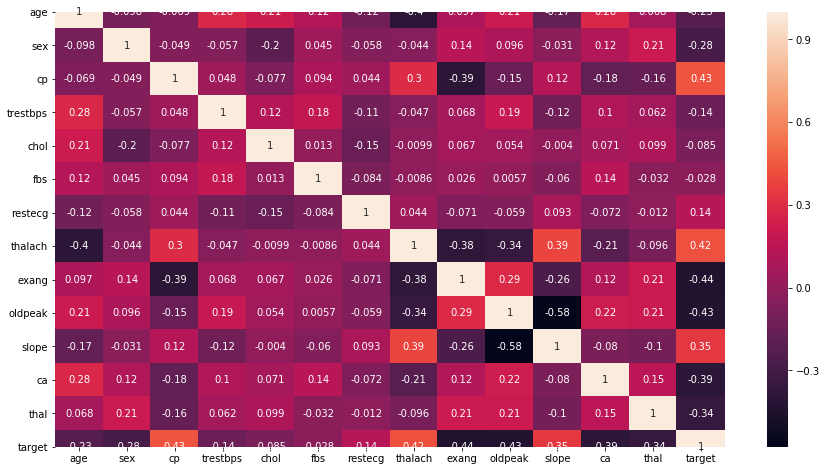

In [62]:
plt.figure(figsize=(15,8))
sns.heatmap(data.corr(), annot=True)

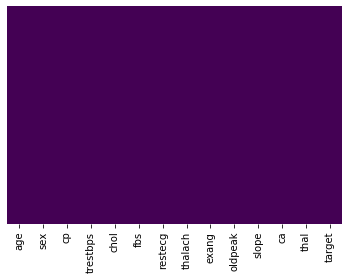

In [63]:
sns.heatmap(data.isnull(),yticklabels=False,cbar=False,cmap='viridis')

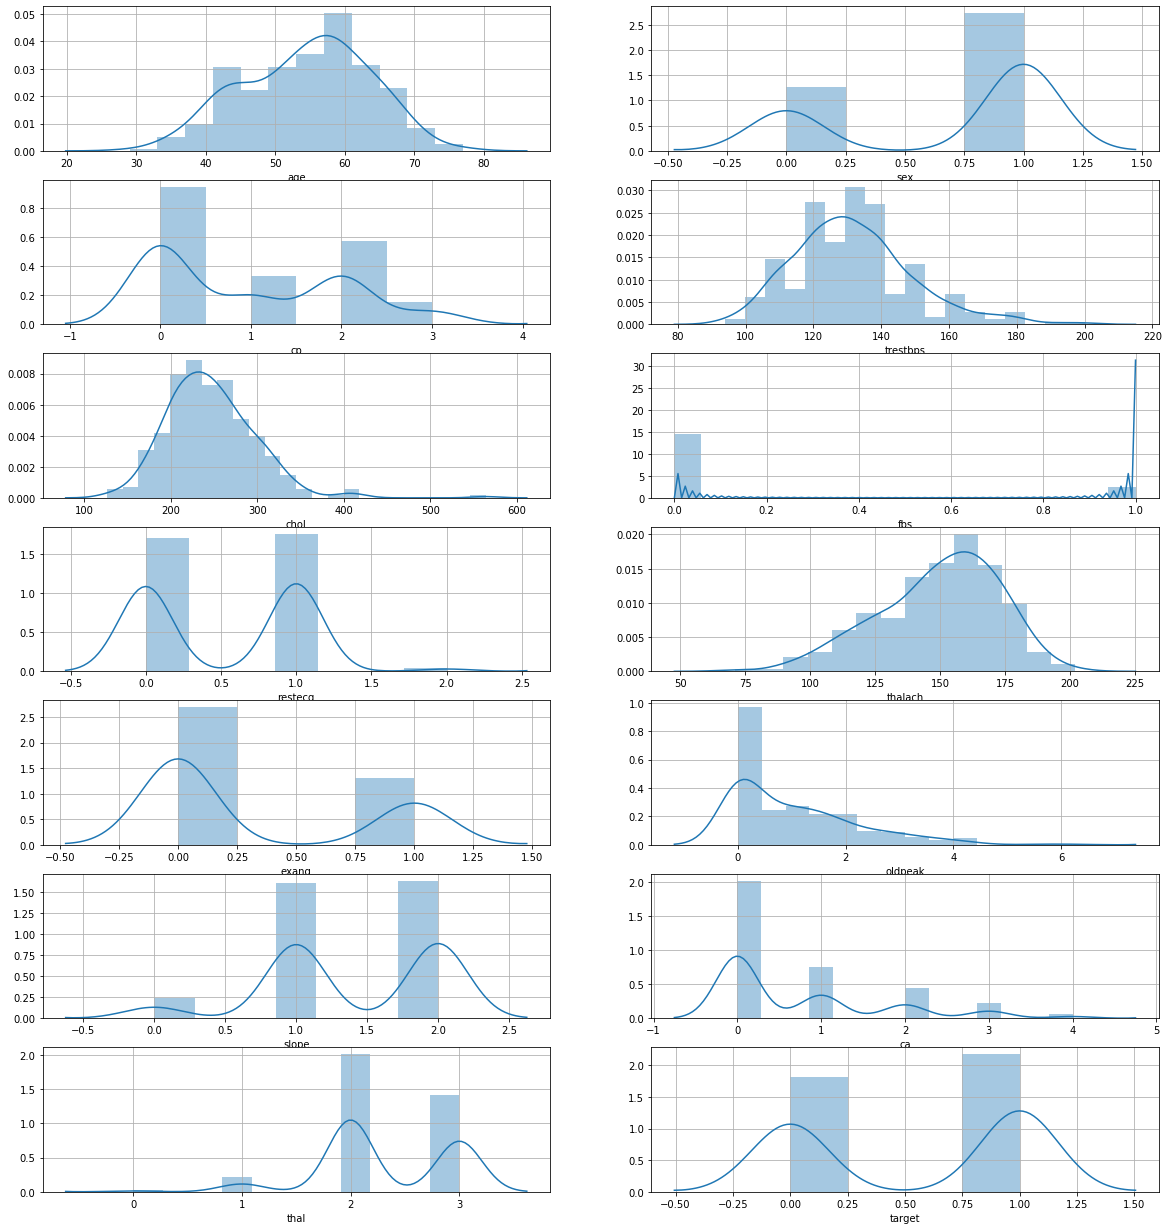

In [64]:
plt.figure(figsize=(20,25))
for i, column in enumerate(list(data.select_dtypes(include=['float64','int64']))):
    plt.subplot(8, 2, i+1)
    sns.distplot(data[column])
    plt.grid()

In [65]:
data.drop(['restecg','sex'],axis=1,inplace=True)

In [66]:
cat_vars=['cp','fbs','exang','slope','ca','thal']

In [67]:
#Custom get_dummies Class for pipeline
class get_dummies_PipeLineFriendly(BaseEstimator, TransformerMixin):
    
    def __init__(self,freq_cutoff=0):
        self.freq_cutoff=freq_cutoff
        self.var_cat_dict={}
        
    def fit(self,x,y=None):
        data_cols=x.columns
        for col in data_cols:
            k=x[col].value_counts()
            cats=k.index[k>self.freq_cutoff][:-1]
            self.var_cat_dict[col]=cats
        return self
            
    def transform(self,x,y=None):
        dummy_data=x.copy()
        for col in self.var_cat_dict.keys():
            for cat in self.var_cat_dict[col]:
                name=col+'_'+str(cat)
                dummy_data[name]=(dummy_data[col]==cat).astype(int)
            del dummy_data[col]
        return dummy_data

In [68]:
data.shape

(303, 12)

In [69]:
columnTransformer = ColumnTransformer([('dummies',get_dummies_PipeLineFriendly(5),cat_vars)],
                                      remainder='passthrough',verbose=True)

In [70]:
X = data.drop(columns=["target"],axis=1)
Y = data["target"]

In [71]:
X_train, X_test, y_train, y_test = train_test_split(X,Y,test_size=0.2,random_state=42)
(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

((242, 11), (61, 11), (242,), (61,))

In [72]:


clfs = []
clfs.append(LogisticRegression())
clfs.append(SVC())
clfs.append(SVC())
#clfs.append(KNeighborsClassifier(n_neighbors=3))
clfs.append(DecisionTreeClassifier())
clfs.append(RandomForestClassifier())
clfs.append(GradientBoostingClassifier())


#Iterator 
for i,classifier in enumerate(clfs):
    
    print("Initializing Pipeline",end="\n\n")
    #Defining Pipeline
    pipe = Pipeline(steps=[('preprocessor', columnTransformer),('classifier', classifier)],verbose=True)
    pipe.fit(X_train, y_train)
    print("\n")
    #Printing current classifier
    print("{}.{}".format(i+1, classifier),end="\n\n")
    #Printing score
#     predicted_values = pipe.predict(X_test)
    
    print('Accuracy is {}'.format(pipe.score(X_test, y_test)))
    if(i==4):
        break
    print("-----------------------------------------------------------------------",end="\n\n")

Initializing Pipeline

[ColumnTransformer] ....... (1 of 2) Processing dummies, total=   0.0s
[ColumnTransformer] ..... (2 of 2) Processing remainder, total=   0.0s
[Pipeline] ...... (step 1 of 2) Processing preprocessor, total=   0.0s
[Pipeline] ........ (step 2 of 2) Processing classifier, total=   0.0s


1.LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

Accuracy is 0.8524590163934426
-----------------------------------------------------------------------

Initializing Pipeline

[ColumnTransformer] ....... (1 of 2) Processing dummies, total=   0.0s
[ColumnTransformer] ..... (2 of 2) Processing remainder, total=   0.0s
[Pipeline] ...... (step 1 of 2) Processing preprocessor, total=   0.0s
[Pipeline] ........ (s

In [76]:
#Generating Random Parameters

# Number of trees in random forest
n_estimators = 200,2000,100

# Number of features to consider at every split
max_features = ['auto', 'sqrt']

# Maximum number of levels in tree
max_depth = [10, 110, 11]
max_depth.append(None)

# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]

# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]

# Method of selecting samples for training each tree
bootstrap = [True, False]

# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
random_grid

{'n_estimators': (200, 2000, 100),
 'max_features': ['auto', 'sqrt'],
 'max_depth': [10, 110, 11, None],
 'min_samples_split': [2, 5, 10],
 'min_samples_leaf': [1, 2, 4],
 'bootstrap': [True, False]}

In [77]:
# Use the random grid to search for best hyperparameters



# First create the base model to tune 
rf = RandomForestClassifier()
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 10, verbose=2, random_state=42, n_jobs = -1)

# Fit the random search model
rf_random.fit(X_train, y_train)

Fitting 10 folds for each of 100 candidates, totalling 1000 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   35.5s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:  2.1min
[Parallel(n_jobs=-1)]: Done 357 tasks      | elapsed:  5.0min
[Parallel(n_jobs=-1)]: Done 640 tasks      | elapsed:  8.6min
[Parallel(n_jobs=-1)]: Done 1000 out of 1000 | elapsed: 161.2min finished


RandomizedSearchCV(cv=10, error_score=nan,
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    ccp_alpha=0.0,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    max_samples=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
              

In [78]:
rf_random.best_params_

{'n_estimators': 200,
 'min_samples_split': 2,
 'min_samples_leaf': 4,
 'max_features': 'sqrt',
 'max_depth': 10,
 'bootstrap': True}

In [79]:
#Running RandomForestRegressor with best parameters

rf = RandomForestClassifier(n_estimators=200, bootstrap=True, max_depth=10, max_features='sqrt', min_samples_leaf=2, min_samples_split=4)

In [80]:
rf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=10, max_features='sqrt',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=2, min_samples_split=4,
                       min_weight_fraction_leaf=0.0, n_estimators=200,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [85]:
predicted_ir=rf.predict(X_test)
predicted_ir
accuracy=accuracy_score(y_test,predicted_ir)
accuracy

0.8524590163934426

In [86]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, predicted_ir))

[[24  5]
 [ 4 28]]
